In [1]:

import os
execfile(os.path.join(os.environ["SPARK_HOME"], 'python/pyspark/shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.3.1
      /_/

Using Python version 2.7.10 (default, Feb  7 2017 00:08:15)
SparkSession available as 'spark'.


In [2]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import explode
from pyspark.sql import Window
import pyspark.sql.functions as f

In [3]:

import numpy as np
import pandas as pd
import seaborn as sn
sn.set_style("darkgrid")

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [4]:
jsonData = spark.read.json("hdfs:///jason/beer")

Sensitivity of beer related tweets

In [15]:
NSFW = jsonData.select('possibly_sensitive')
NS = NSFW.dropna()
NScounts = NS.groupBy('possibly_sensitive').count()
NScounts.show()

+------------------+------+
|possibly_sensitive| count|
+------------------+------+
|              true|  1347|
|             false|107050|
+------------------+------+



In [24]:
NS = NScounts.toPandas()

In [28]:
NS.count

<bound method DataFrame.count of    possibly_sensitive   count
0                True    1347
1               False  107050>

([<matplotlib.patches.Wedge at 0x112990410>,
 [Text(-0.869603,0.67364,'True'), Text(0.869603,-0.67364,'False')])

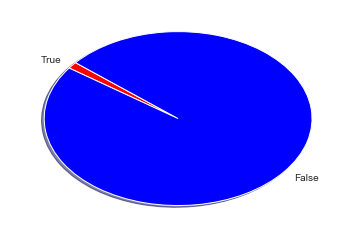

In [31]:
plt.pie(NS['count'], labels=NS.possibly_sensitive, colors=['red', 'blue'], shadow=True, startangle=140)